In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# sns.set_context("paper", rc={"figure.figsize": (4, 4)})

# Load data

In [2]:
df = pd.read_csv('../data/Metagenomic_binning_tools_to_consider.csv')
df

,Tool,Year published,Tool category,Sequences binned,User interface,Programming language(s),Minimum length cut-off (bp),Composition,Abundance,Graphs,Other,Publication,Source code
0,TETRA,2004,Binning,Fragments,Web GUI,NaN,1000.0,Y,NaN,NaN,NaN,https://bmcbioinformatics.biomedcentral.com/ar...,NaN
1,CompostBin,2008,Binning,Short reads,CLI,"C, Matlab",1000.0,Y,NaN,NaN,NaN,https://link.springer.com/chapter/10.1007/978-...,http://bobcat.genomecenter.ucdavis.edu/souravc...
2,LikelyBin,2009,Binning,Short reads,CLI,"Perl, C",400.0,Y,NaN,NaN,NaN,https://bmcbioinformatics.biomedcentral.com/ar...,https://static-content.springer.com/esm/art%3A...
3,MetaCluster 2.0,2010,Binning,Fragments,CLI,C,300.0,Y,NaN,NaN,NaN,https://dl.acm.org/doi/10.1145/1854776.1854803,https://i.cs.hku.hk/~alse/MetaCluster/
4,SCIMM,2010,Binning,Contigs and short reads,CLI,"Python, C, Matlab",400.0,Y,NaN,NaN,NaN,https://bmcbioinformatics.biomedcentral.com/ar...,https://www.cbcb.umd.edu/software/scimm/
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,UGMAGrefiner,2023,Refiner,Unitigs,CLI,NaN,NaN,NaN,NaN,NaN,NaN,https://www.sciencedirect.com/science/article/...,NaN
69,COMEBin,2024,Binning,Contigs,CLI,Python,1000.0,Y,Y,NaN,Single-copy marker genes,https://www.nature.com/articles/s41467-023-442...,https://github.com/ziyewang/COMEBin
70,BASALT,2024,Ensemble binner,Contigs,CLI,Python,NaN,NaN,NaN,NaN,NaN,https://www.nature.com/articles/s41467-024-465...,https://github.com/EMBL-PKU/BASALT
71,UnitigBIN,2024,Binning,Contigs,CLI,Python,NaN,Y,Y,Assembly graph,Single-copy marker genes,https://openreview.net/forum?id=vBw8JGBJWj,https://github.com/xuehansheng/UnitigBIN


# Plot by Category

Text(0.5, 0, 'Count of tools')

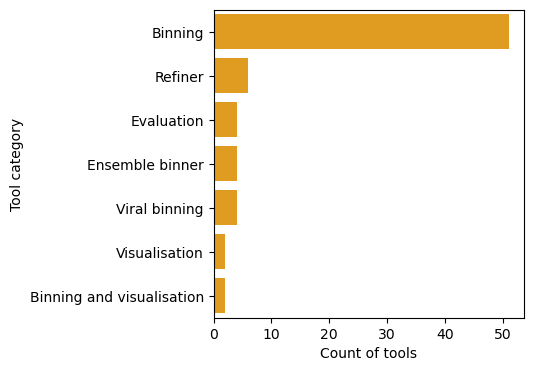

In [3]:
plt.figure(figsize=(4, 4))
sns.countplot(y='Tool category', data=df, order=df['Tool category'].value_counts().index, color="orange")
plt.ylabel("Tool category")
plt.xlabel("Count of tools")


# Plot by Language

Text(0.5, 0, 'Count of tools')

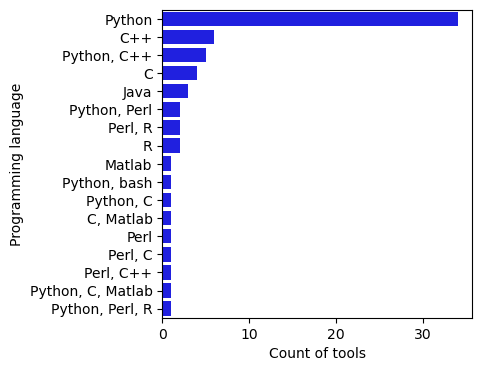

In [4]:
plt.figure(figsize=(4, 4))
sns.countplot(y='Programming language(s)', data=df, order=df['Programming language(s)'].value_counts().index, color="blue")
plt.ylabel("Programming language")
plt.xlabel("Count of tools")


# Plot by CLI/GUI

Text(0.5, 0, 'Count of tools')

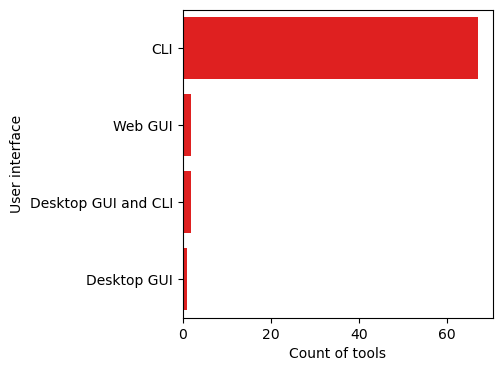

In [5]:
plt.figure(figsize=(4, 4))
sns.countplot(y='User interface', data=df, order=df['User interface'].value_counts().index, color="red")
plt.ylabel("User interface")
plt.xlabel("Count of tools")


# Plot by Contigs/reads

Text(0.5, 0, 'Count of tools')

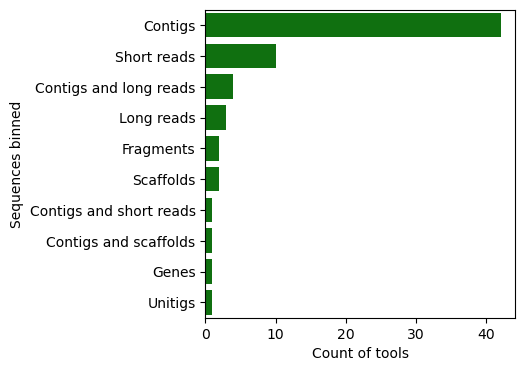

In [6]:
plt.figure(figsize=(4, 4))
sns.countplot(y='Sequences binned', data=df, order=df['Sequences binned'].value_counts().index, color="green")
plt.ylabel("Sequences binned")
plt.xlabel("Count of tools")


# Plot by Year

In [7]:
year_counts = dict(df['Year published'].value_counts())
min_year = min(year_counts.keys())
max_year = max(year_counts.keys())

sum = 0
for i in range(min_year, max_year):
    if i not in year_counts:
        year_counts[i] = 0

year_counts = dict(sorted(year_counts.items()))

sum = 0
for i in year_counts:
    sum += year_counts[i]
    year_counts[i] = sum

print(year_counts)

{2004: 1, 2005: 1, 2006: 1, 2007: 1, 2008: 2, 2009: 3, 2010: 5, 2011: 7, 2012: 11, 2013: 12, 2014: 16, 2015: 24, 2016: 28, 2017: 34, 2018: 39, 2019: 43, 2020: 45, 2021: 50, 2022: 62, 2023: 69, 2024: 73}


Text(0.5, 0, 'Cumulative count of tools')

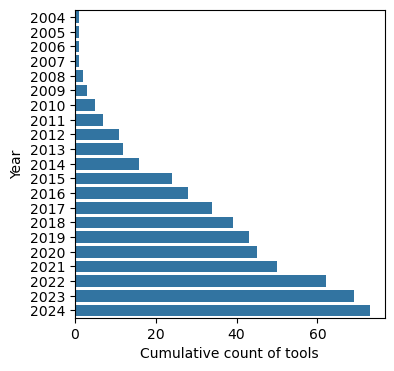

In [8]:
plt.figure(figsize=(4, 4))

sns.barplot(y=year_counts.keys(), x=year_counts.values(), orient = 'h')

plt.ylabel("Year")
plt.xlabel("Cumulative count of tools")

# All together

/var/folders/d_/jkfr20w97ts4vt06dgk79znh0000gn/T/ipykernel_17531/1235332592.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2, 0].set_yticklabels(['75', '100', '300', '400', '500', '1000', '1500', '2000', '2048', '2500', '5000'])


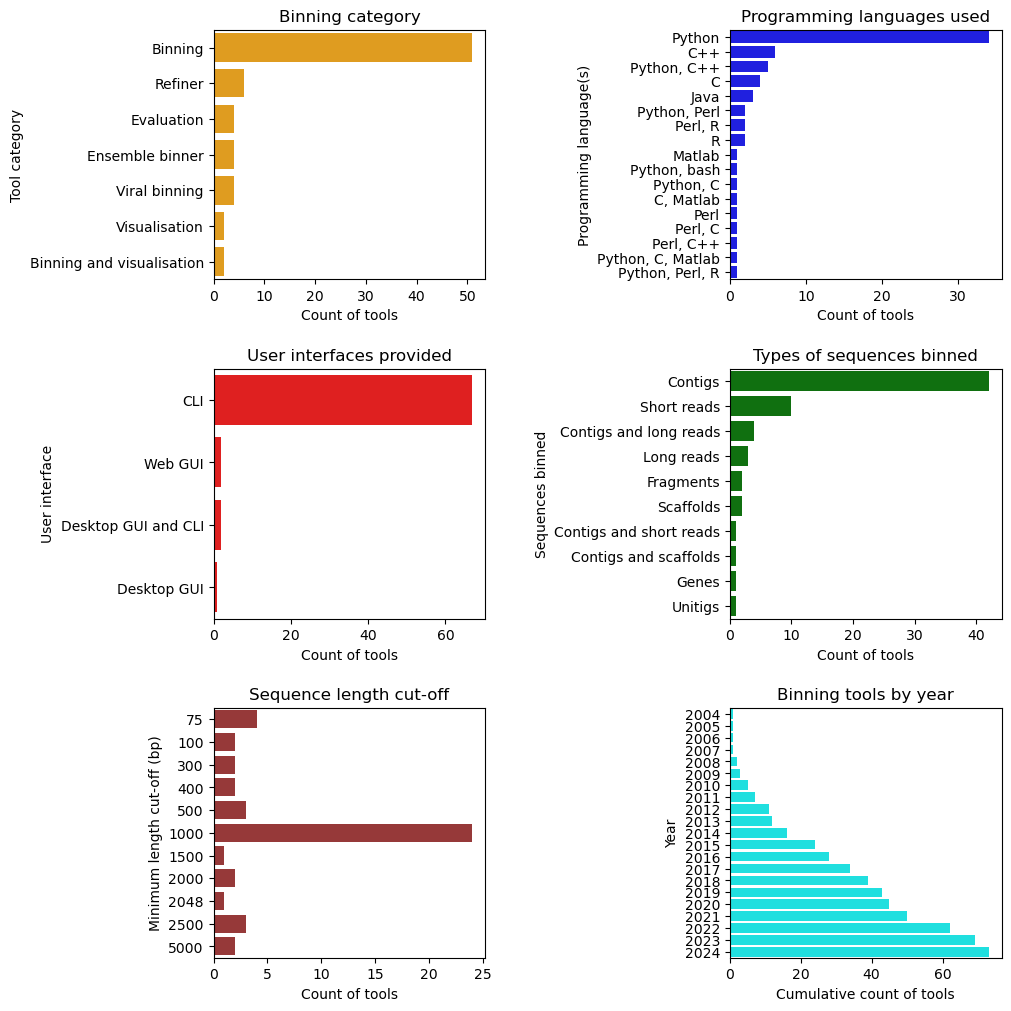

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)

# Create plots using Seaborn
g = sns.countplot(y='Tool category', data=df, order=df['Tool category'].value_counts().index, color="orange", ax=axes[0, 0])
axes[0, 0].set_xlabel('Count of tools')
axes[0, 0].set_title('Binning category')

sns.countplot(y='Programming language(s)', data=df, order=df['Programming language(s)'].value_counts().index, color="blue", ax=axes[0, 1])
axes[0, 1].set_xlabel('Count of tools')
axes[0, 1].set_title('Programming languages used')

sns.countplot(y='User interface', data=df, order=df['User interface'].value_counts().index, color="red", ax=axes[1, 0])
axes[1, 0].set_xlabel('Count of tools')
axes[1, 0].set_title('\nUser interfaces provided')

sns.countplot(y='Sequences binned', data=df, order=df['Sequences binned'].value_counts().index, color="green", ax=axes[1, 1])
axes[1, 1].set_ylabel('\n\nSequences binned')
axes[1, 1].set_xlabel('Count of tools')
axes[1, 1].set_title('\nTypes of sequences binned')

lengths = list(df['Minimum length cut-off (bp)'].unique())
del lengths[5]
lengths.sort()
lengths_int = [str(int(x)) for x in lengths]

sns.countplot(y='Minimum length cut-off (bp)', data=df, order=lengths, color="brown", ax=axes[2, 0])
axes[2, 0].set_xlabel('Count of tools')
axes[2, 0].set_title('\nSequence length cut-off')
axes[2, 0].set_yticklabels(['75', '100', '300', '400', '500', '1000', '1500', '2000', '2048', '2500', '5000'])

sns.barplot(y=year_counts.keys(), x=year_counts.values(), orient = 'h', color="aqua", ax=axes[2, 1])
axes[2, 1].set_title('\nBinning tools by year')
axes[2, 1].set_ylabel("Year")
axes[2, 1].set_xlabel("Cumulative count of tools")

plt.savefig('../Images/binning_tools_summarised.svg', dpi=300, format="svg", bbox_inches='tight')
plt.show()